In [1]:
import sys
sys.path.append('/home/yja6qa/arepo_package/')
import arepo_package
import scipy.interpolate
radiative_efficiency=0.2
import h5py
%pylab inline
import os
import numpy as np
from brahma_analysis import *
from sklearn.linear_model import LinearRegression

h = 0.6774

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


NameError: name 'x' is not defined

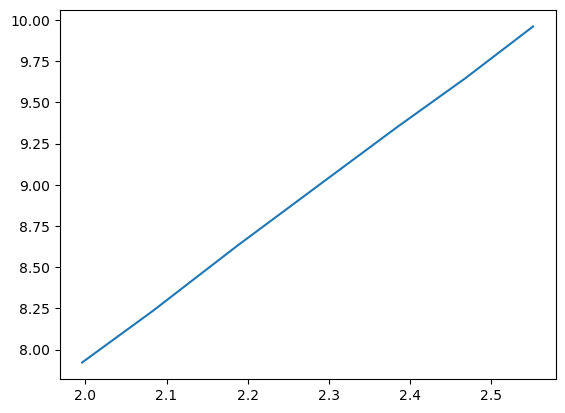

In [2]:
xs = [1.996031746031746, 2.0833333333333335, 2.1865079365079363, 2.2936507936507935, 2.384920634920635, 2.4682539682539684,2.5515873015873014]
ys = [7.921568627450981,8.235294117647058,8.627450980392158,9.019607843137255,9.352941176470589,9.647058823529413,9.96078431372549]
plt.plot(xs,ys,label='top')
plt.plot(x,y[0],label='Illustris?')
plt.plot(x,TNGy[0],label='TNG?')
plt.legend()

In [5]:
Korm_Ho_2013=np.array([1.7222222222222223, 5.980392156862745,1.8611111111111112, 6.568627450980392,1.9801587301587302, 7.098039215686274,2.0912698412698414, 7.568627450980392,2.1666666666666665, 7.901960784313726,2.253968253968254, 8.294117647058824,2.365079365079365, 8.784313725490197,2.492063492063492, 9.333333333333334,2.575396825396825, 9.686274509803923])

model=LinearRegression()

KH13_x = list(np.arange(0,len(Korm_Ho_2013)-2,2))
KH13_y=list(np.arange(1,len(Korm_Ho_2013)-1,2))

modelx=Korm_Ho_2013[KH13_x].reshape(-1, 1)
modely=Korm_Ho_2013[KH13_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit=np.linspace(0.75,2.5,100)
KH13_yfit=model.coef_*x + model.intercept_

In [4]:
modelTNG = LinearRegression()
model=LinearRegression()

Illustris_TNG = np.array([2.587301587301587, 9.627450980392155,2.4761904761904763, 9.352941176470587,2.373015873015873, 
                 9.117647058823529,2.2777777777777777, 8.88235294117647,2.142857142857143, 8.549019607843135,
                 2.0396825396825395, 8.313725490196077,1.996031746031746, 8.196078431372548])

Illustris = np.array([2.5555555555555554, 10.017740429505135,2.4126984126984126, 9.482726423902893,
                      2.317460317460317, 9.126050420168067,2.238095238095238, 8.828820417055711,2.142857142857143, 
                      8.491752256458138,2.0436507936507935, 8.11531279178338,2, 7.9567382508558975])

xs=list(np.arange(0,14,2))
ys=list(np.arange(1,15,2))

modelxTNG=Illustris_TNG[xs].reshape(-1, 1)
modelyTNG=Illustris_TNG[ys].reshape(-1, 1)

modelx=Illustris[xs].reshape(-1, 1)
modely=Illustris[ys].reshape(-1, 1)

modelTNG.fit(modelxTNG,modelyTNG)
model.fit(modelx,modely)

x=np.linspace(0.75,2.5,100)
TNGy=modelTNG.coef_*x + modelTNG.intercept_
y=model.coef_*x + model.intercept_

In [2]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMass'
redshifts = [5,0]
part=4
Prop1list,Prop2list,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,part_type=part)

In [3]:
AllBoxMeans,AllBoxStdDevs,Xpoints = mean_trends(Prop1list,Prop2list,redshifts,limits,bins=8)

/sfs/qumulo/qhome/yja6qa/arepo_package/brahma_analysis.py:168: RuntimeWarning: divide by zero encountered in log10
  ids = np.where(np.logical_and(np.log10(Prop1list[i][ii])>=bins[iii],
/sfs/qumulo/qhome/yja6qa/arepo_package/brahma_analysis.py:169: RuntimeWarning: divide by zero encountered in log10
  np.log10(Prop1list[i][ii])<=bins[iii+1]))[0]
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/software/standard/core/ju

(<Figure size 1500x500 with 2 Axes>,
 array([<Axes: title={'center': 'Z=5'}>, <Axes: title={'center': 'Z=0'}>],
       dtype=object))

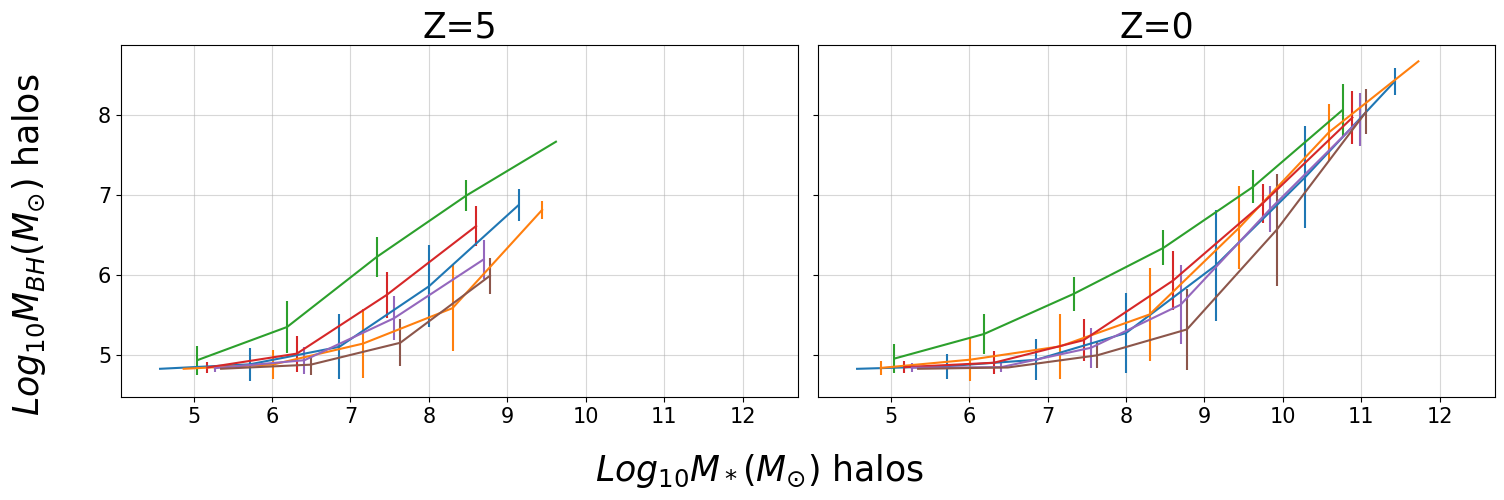

In [4]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_* (M_{\odot})$ halos','$Log_{10}M_{BH} (M_{\odot})$ halos']

plot_brahma(AllBoxMeans,AllBoxStdDevs,Xpoints,redshifts,legend_names,axislabels,savefig = False)

# Now: Stellar Mass vs BH Accretion Rate

In [5]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMdot'
redshifts = [5,0]
part_type=4

# (1e10 Msun/h)/(0.978Gyr/h)
conversion2 = 1e10/0.978
SMlist,BH_Mdotlist,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,part_type,conversion2=conversion2)


In [6]:
MDotMeans,MdotStdDevs,MdotXpoints = mean_trends(SMlist,BH_Mdotlist,redshifts,limits,bins=8)

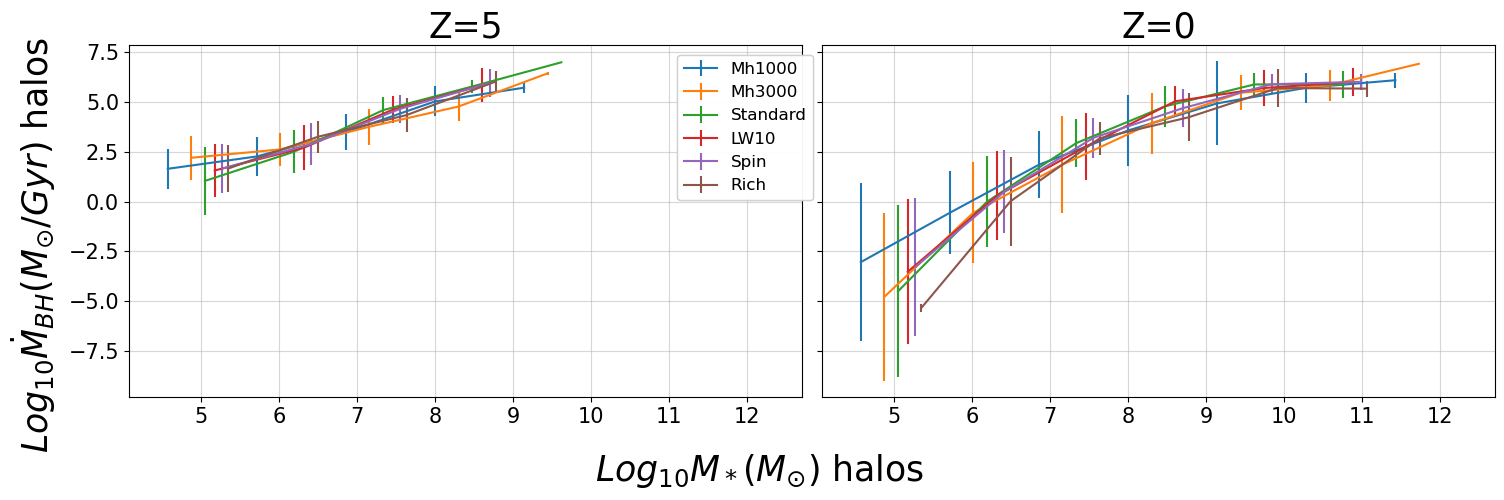

In [7]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_* (M_{\odot})$ halos','$Log_{10}\dot{M}_{BH} (M_{\odot}/Gyr)$ halos']

f,axes = plot_brahma(MDotMeans,MdotStdDevs,MdotXpoints,redshifts,legend_names,axislabels,savefig = 'BHMdot_Mstars.png')
f.legend(loc = (0.45,0.6),fontsize = 12)

## Converting Mdot to L

From https://ui.adsabs.harvard.edu/abs/2024MNRAS.529.3768B/abstract:

Accreting black holes radiate at bolometric luminosities given by

$L_{bol} = \epsilon_r * \dot{M}_{BH} * c^2$

where $\epsilon_r = 0.2$ is the radiative efficiency.

In [8]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMdot'
redshifts = [5,0]
part_type=4

# (1e10 Msun/h)/(0.978Gyr/h)
conversion2 = 1e10/0.978
SMlist,Lbollist,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,
                                                     part_type,conversion2=conversion2,Lbol=[False,True])


In [9]:
LbolMeans,LbolStdDevs,LbolXpoints = mean_trends(SMlist,Lbollist,redshifts,limits,bins=8)

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


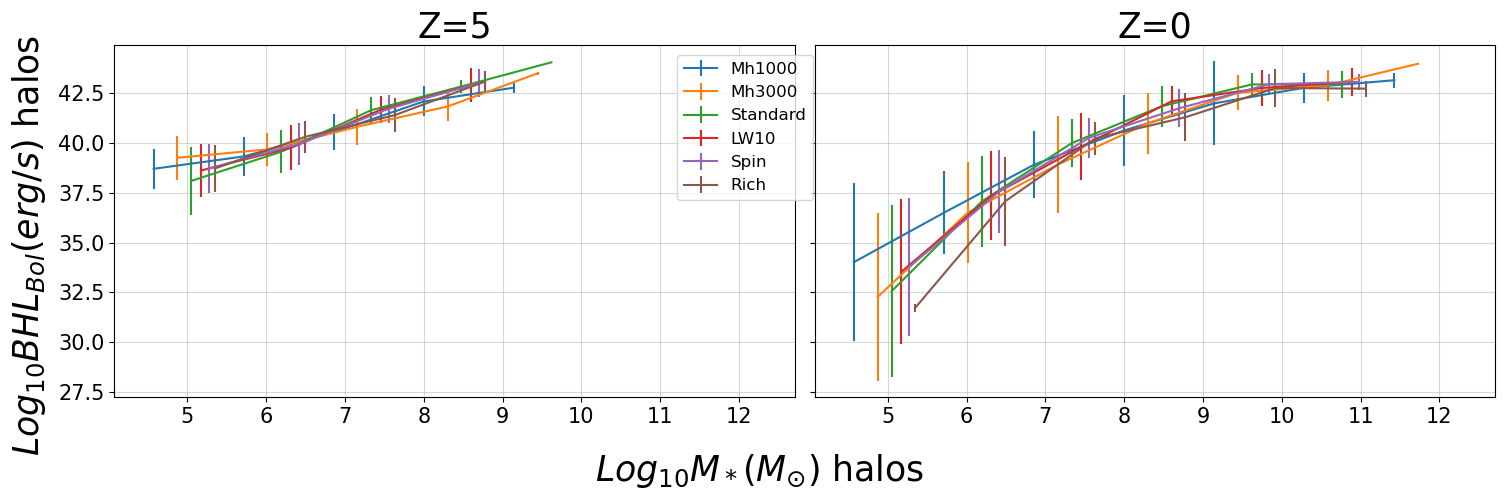

In [10]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_* (M_{\odot})$ halos','$Log_{10}BH L_{Bol} (erg/s)$ halos']

f,axes = plot_brahma(LbolMeans,LbolStdDevs,LbolXpoints,redshifts,legend_names,axislabels,savefig = 'BH_LBol_Mstars.png')


# Now, BH Mass vs BH Accretion Rate

In [11]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMdot'
redshifts = [5,0]
part_type=5 # We want BH mass now

# (1e10 Msun/h)/(0.978Gyr/h)
conversion2 = 1e10/0.978
BHMlist,BH_Mdotlist,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,part_type,conversion2=conversion2)


In [12]:
BHMMeans,MdotStdDevs,MdotXpoints = mean_trends(BHMlist,BH_Mdotlist,redshifts,limits,bins=8)

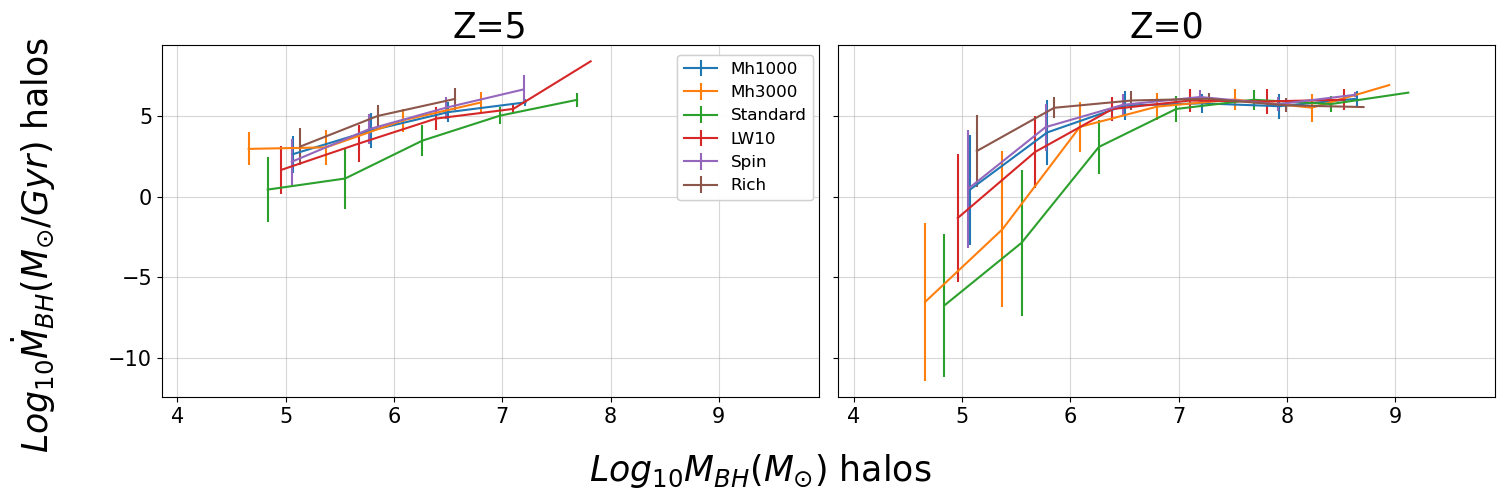

In [13]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_{BH} (M_{\odot})$ halos','$Log_{10}\dot{M}_{BH} (M_{\odot}/Gyr)$ halos']

f,axes = plot_brahma(BHMMeans,MdotStdDevs,MdotXpoints,redshifts,legend_names,axislabels,savefig = 'BHMdot_MBH.png')
f.legend(loc = (0.45,0.6),fontsize = 12)

# Getting Particle Properties

List of fields for star particles:

['count', 'BirthDensity', 'BirthPos', 'BirthVel', 'Coordinates', 'GFM_InitialMass', 'GFM_Metallicity', 'GFM_Metals', 'GFM_MetalsTagged', 'GFM_StellarFormationTime', 'GFM_StellarPhotometrics','HostHaloMass', 'IsThisTheMinPotential', 'Masses', 'Parent_GasID', 'ParticleIDs', 'Potential', 'SeedMass', 'Spawned','StellarAgeGyr','SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities', 'no_of_BHs_ngb']

In [5]:
### See arepo_package line 271

path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

output_path = path_to_output + run + outputlist[2]
particle_property = None # Should grab all fields, see snapshot.py line 213
p_type = 4 # Stars
desired_redshift = 5

particles, redshifts = arepo_package.get_particle_property(output_path,particle_property,p_type,desired_redshift)


Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20


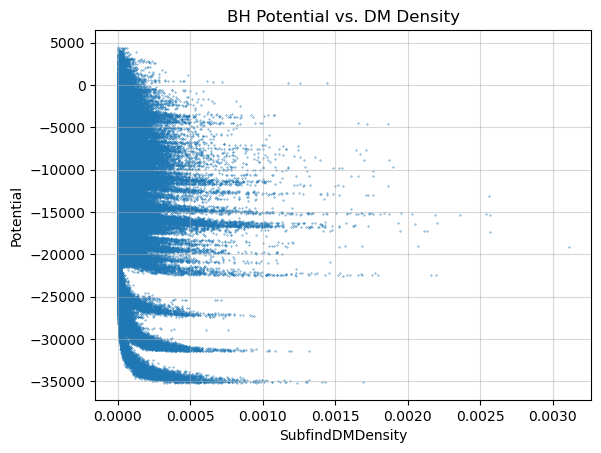

In [27]:
plt.scatter(particles['SubfindDMDensity'],particles['Potential'],s = 0.1)
plt.xlabel('SubfindDMDensity')
plt.ylabel('Potential')
plt.title('BH Potential vs. DM Density')
plt.grid(alpha = 0.5)
plt.savefig('BH_particle_img.png')

## BH Mass vs # Progenitors

In [23]:
### See arepo_package line 271

path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

output_path = path_to_output + run + outputlist[2]
particle_property = None # Should grab all fields, see snapshot.py line 213
p_type = 5 # BHs
desired_redshift1 = 5
desired_redshift2 = 0

particles, redshifts = arepo_package.get_particle_property(output_path,particle_property,p_type,desired_redshift1)
particles2, redshifts = arepo_package.get_particle_property(output_path,particle_property,p_type,desired_redshift2)

Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  32


In [28]:
BH_Mass1 = particles['BH_Mass']*1e10*0.6774
BH_Mass2 = particles2['BH_Mass']*1e10*0.6774

N_Prog1 = particles['BH_Progs']
N_Prog2 = particles2['BH_Progs']

BH_Mass_from_Mergers1 = (particles['BH_Mass']-particles['BH_CumMassGrowth_QM']-particles['BH_CumMassGrowth_RM'])*1e10*0.6774
BH_Mass_from_Mergers2 = (particles2['BH_Mass']-particles2['BH_CumMassGrowth_QM']-particles2['BH_CumMassGrowth_RM'])*1e10*0.6774

Merger_Frac1 = BH_Mass_from_Mergers1/BH_Mass1
Merger_Frac2 = BH_Mass_from_Mergers2/BH_Mass2


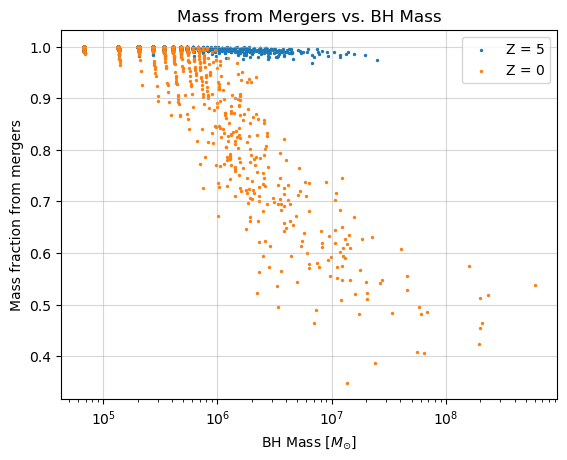

In [35]:
f,ax = plt.subplots(1,1)
ax.scatter(BH_Mass1,Merger_Frac1,s = 2,label = 'Z = 5')
ax.scatter(BH_Mass2,Merger_Frac2,s = 2,label = 'Z = 0')
ax.set_xscale('log')
ax.set_xlabel('BH Mass $[M_{\odot}]$')
ax.set_ylabel('Mass fraction from mergers')
ax.set(title='Mass from Mergers vs. BH Mass')
ax.grid(alpha = 0.5)
ax.legend()
plt.savefig('Merger_Mass_vs_BH_Mass.png')

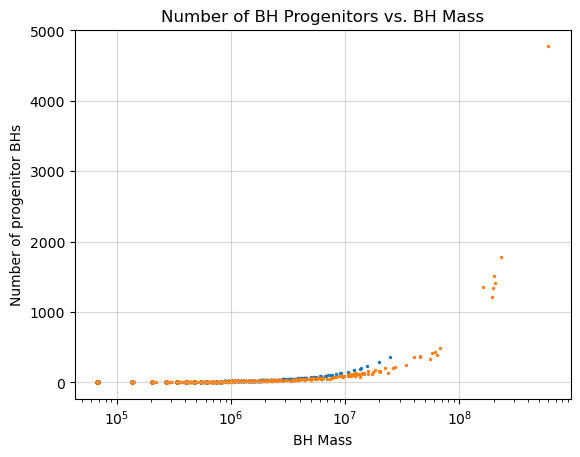

In [25]:
f,ax = plt.subplots(1,1)
ax.scatter(BH_Mass1,N_Prog1,s = 2,label = 'Z = 5')
ax.scatter(BH_Mass2,N_Prog2,s = 2,label = 'Z = 0')
ax.set_xscale('log')
ax.set_xlabel('BH Mass')
ax.set_ylabel('Number of progenitor BHs')
ax.set(title='Number of BH Progenitors vs. BH Mass')
ax.grid(alpha = 0.5)
plt.savefig('N_Progenitors_vs_BH_Mass.png')

## Gas particle data

In [2]:
# ### See arepo_package line 271

# path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
# run='/AREPO/' # name of the simulation runs

# outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
#             'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
#             'output_ratio10_SFMFGM5_seed5.00_bFOF/',
#             'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
#             'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
#             'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

# output_path = path_to_output + run + outputlist[2]
# particle_property = None # Should grab all fields, see snapshot.py line 213
# p_type = 1 # Gas
# desired_redshift = 5

# # This causes my kernel to die when using 1 core; runs properly with 6 cores
# particles, redshifts = arepo_package.get_particle_property(output_path,particle_property,p_type,desired_redshift)


Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20


# Plotting parent halo DM dist, subhalo stellar dist, central MBH Pos

In [6]:
#-----------------Path of the simulation----------------
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

#----------------Assign redshift snapshot and particle type we want to select
desired_redshift=0
p_type1=4       # Grabbing stellar particles
p_type2=0       # Grabbing DM particles
p_type3=5       # Grabbing BH pparticles

#----------------Get the subhalo catalog and select only those subhalos that have enough stars
SubhaloLenType,o = arepo_package.get_subhalo_property(basePath,'SubhaloLenType',desired_redshift,postprocessed=1)
SubhaloSMLen = SubhaloLenType[:,p_type1]
SubhaloIndices = numpy.arange(0,len(SubhaloSMLen))
mask= SubhaloSMLen>100
SubhaloIndicesWithStars = SubhaloIndices[mask]

#---------------Select the desired index on the masked catalog, 
desired_index = 100 # Randomly selecting an index

#---------------Assign the true index of the subhalo to be selected 
ActualSubhaloIndex = SubhaloIndicesWithStars[desired_index]

#---------------Retrieve the coordinates of the subhalo and the coordinates of the parent group
StarCoordinates_subhalo,StarCoordinates_group,Staroutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type1,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
DMCoordinates_subhalo,DMCoordinates_group,DMoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type2,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
BHCoordinates_subhalo,BHCoordinates_group,BHoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type3,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
BHMasses_subhalo,BHMasses_group,BHoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Masses',p_type3,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')

h=0.6774
SubHaloMass,o = arepo_package.get_subhalo_property(basePath,'SubhaloMassType',desired_redshift,postprocessed=1)
SubhaloStellarMass = SubHaloMass[:,4][ActualSubhaloIndex]*1e10/h

BHcoord=BHCoordinates_subhalo[np.argmax(BHMasses_subhalo)]

print(SubhaloStellarMass*1e-8)

offsets were already there
offsets were already there
offsets were already there
offsets were already there
1.3630446195074475


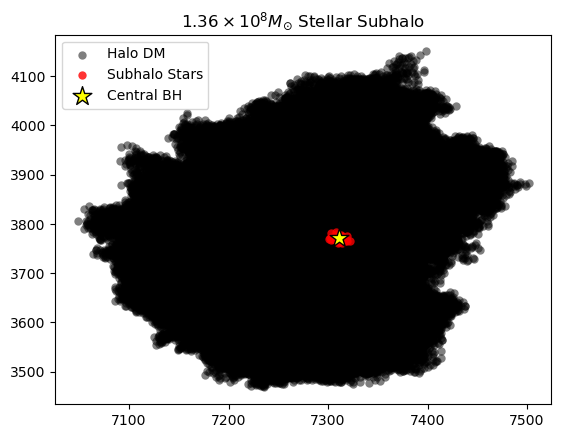

In [7]:
# Plot their positions.

plt.scatter(DMCoordinates_group[:,0],DMCoordinates_group[:,1],marker='o',linewidth=0,alpha=0.5,color='black',label='Halo DM')

plt.scatter(StarCoordinates_subhalo[:,0],StarCoordinates_subhalo[:,1],marker='o',linewidth=0,alpha=0.8,color='red',label='Subhalo Stars')

plt.scatter(BHcoord[0],BHcoord[1],color='yellow',edgecolor='black',s=200,marker = '*',label='Central BH')

plt.title(r'$1.36 \times 10^{8} M_{\odot}$ Stellar Subhalo')

plt.legend()

plt.savefig('Subgroup100.png')

In [8]:
#-----------------Path of the simulation----------------
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

#----------------Assign redshift snapshot and particle type we want to select
desired_redshift=0
p_type1=4       # Grabbing stellar particles
p_type2=0       # Grabbing DM particles
p_type3=5       # Grabbing BH pparticles

#----------------Get the subhalo catalog and select only those subhalos that have enough stars
SubhaloLenType,o = arepo_package.get_subhalo_property(basePath,'SubhaloLenType',desired_redshift,postprocessed=1)
SubhaloSMLen = SubhaloLenType[:,p_type1]
SubhaloIndices = numpy.arange(0,len(SubhaloSMLen))
mask= SubhaloSMLen>100
SubhaloIndicesWithStars = SubhaloIndices[mask]

#---------------Select the desired index on the masked catalog, 
desired_index = 200 # Randomly selecting an index

#---------------Assign the true index of the subhalo to be selected 
ActualSubhaloIndex = SubhaloIndicesWithStars[desired_index]

#---------------Retrieve the coordinates of the subhalo and the coordinates of the parent group
StarCoordinates_subhalo,StarCoordinates_group,Staroutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type1,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
DMCoordinates_subhalo,DMCoordinates_group,DMoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type2,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
BHCoordinates_subhalo,BHCoordinates_group,BHoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type3,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
BHMasses_subhalo,BHMasses_group,BHoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Masses',p_type3,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')

SubHaloMass,o = arepo_package.get_subhalo_property(basePath,'SubhaloMassType',desired_redshift,postprocessed=1)
SubhaloStellarMass = SubHaloMass[:,4][ActualSubhaloIndex]*1e10/h

BHcoord=BHCoordinates_subhalo[np.argmax(BHMasses_subhalo)]

print(SubhaloStellarMass*1e-8)

offsets were already there
offsets were already there
offsets were already there
offsets were already there
2.0102299430886306


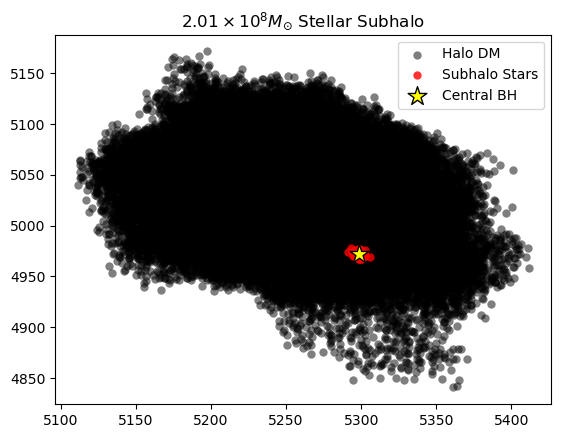

In [9]:
# Plot their positions.

plt.scatter(DMCoordinates_group[:,0],DMCoordinates_group[:,1],marker='o',linewidth=0,alpha=0.5,color='black',label='Halo DM')

plt.scatter(StarCoordinates_subhalo[:,0],StarCoordinates_subhalo[:,1],marker='o',linewidth=0,alpha=0.8,color='red',label='Subhalo Stars')

plt.scatter(BHcoord[0],BHcoord[1],color='yellow',edgecolor='black',s=200,marker = '*',label='Central BH')

plt.title(r'$2.01 \times 10^{8} M_{\odot}$ Stellar Subhalo')

plt.legend()

plt.savefig('Subgroup200.png')

In [10]:
#-----------------Path of the simulation----------------
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

#----------------Assign redshift snapshot and particle type we want to select
desired_redshift=0
p_type1=4       # Grabbing stellar particles
p_type2=0       # Grabbing DM particles
p_type3=5       # Grabbing BH pparticles

#----------------Get the subhalo catalog and select only those subhalos that have enough stars
SubhaloLenType,o = arepo_package.get_subhalo_property(basePath,'SubhaloLenType',desired_redshift,postprocessed=1)
SubhaloSMLen = SubhaloLenType[:,p_type1]
SubhaloIndices = numpy.arange(0,len(SubhaloSMLen))
mask= SubhaloSMLen>100
SubhaloIndicesWithStars = SubhaloIndices[mask]

#---------------Select the desired index on the masked catalog, 
desired_index = 300 # Randomly selecting an index

#---------------Assign the true index of the subhalo to be selected 
ActualSubhaloIndex = SubhaloIndicesWithStars[desired_index]

#---------------Retrieve the coordinates of the subhalo and the coordinates of the parent group
StarCoordinates_subhalo,StarCoordinates_group,Staroutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type1,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
DMCoordinates_subhalo,DMCoordinates_group,DMoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type2,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
BHCoordinates_subhalo,BHCoordinates_group,BHoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type3,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
BHMasses_subhalo,BHMasses_group,BHoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Masses',p_type3,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')

SubHaloMass,o = arepo_package.get_subhalo_property(basePath,'SubhaloMassType',desired_redshift,postprocessed=1)
SubhaloStellarMass = SubHaloMass[:,4][ActualSubhaloIndex]*1e10/h

BHcoord=BHCoordinates_subhalo[np.argmax(BHMasses_subhalo)]

print(SubhaloStellarMass*1e-8)

offsets were already there
offsets were already there
offsets were already there
offsets were already there
9.912938090739152


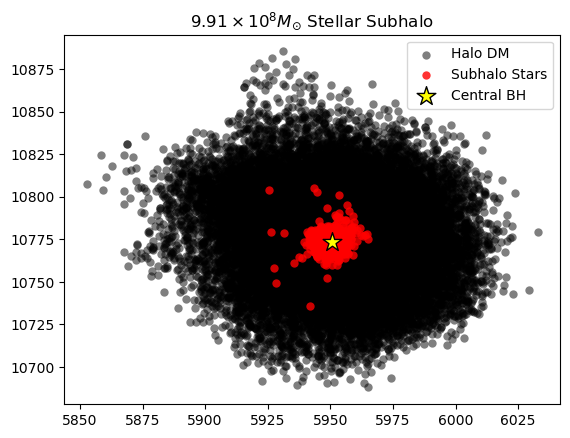

In [11]:
# Plot their positions.

plt.scatter(DMCoordinates_group[:,0],DMCoordinates_group[:,1],marker='o',linewidth=0,alpha=0.5,color='black',label='Halo DM')

plt.scatter(StarCoordinates_subhalo[:,0],StarCoordinates_subhalo[:,1],marker='o',linewidth=0,alpha=0.8,color='red',label='Subhalo Stars')

plt.scatter(BHcoord[0],BHcoord[1],color='yellow',edgecolor='black',s=200,marker = '*',label='Central BH')

plt.title(r'$9.91 \times 10^{8} M_{\odot}$ Stellar Subhalo')

plt.legend()

plt.savefig('Subgroup300.png')

# Plotting M-sigma!

In [2]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

desired_redshift=0

SubhaloLenType,o = arepo_package.get_subhalo_property(basePath,'SubhaloLenType',desired_redshift,postprocessed=1)
SubhaloBHLen = SubhaloLenType[:,5]
SubhaloStarsLen = SubhaloLenType[:,4]


In [2]:
import time

path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

N = 10
indices = np.arange(0,N)
desired_redshift = 0

start_time = time.time()
M,MStars,Sigma,VelsMag,Velocities,NStars,BH_progs,IgnoredBhs = M_Sigma(basePath,desired_redshift,desired_indices=indices)
end_time = time.time()

t_per_halo = (end_time-start_time)/N

In [3]:
Write2File(M,MStars,Sigma,VelsMag,Velocities,NStars,BH_progs,IgnoredBhs)

In [4]:
Data=ReadBrahmaData()

# Testing python script for errors:

In [12]:
MStars_subhalo=np.array([1,1,1])
Vel_BH=np.array([[2,1,3],[4,6,1],[4,3,2]])
Vel_CM=Vel_BH/2
mu_BH = np.mean(Vel_BH,axis=0) # Average 3D stellar velocity for this subhalo
mu_CM = np.mean(Vel_CM,axis=0)
Mstars_total=np.sum(MStars_subhalo)
N=len(MStars_subhalo)

# Here we weight the sigma calculation by stellar mass
BHDiffSquared=MStars_subhalo[:, np.newaxis]*np.array((Vel_BH - mu_BH)** 2)
CMDiffSquared=MStars_subhalo[:, np.newaxis]*np.array((Vel_CM - mu_CM)** 2)

Sigma_BH = np.sqrt(np.sum(BHDiffSquared,axis=0) / Mstars_total)  # Calculate sigma from subhalo velocity
Sigma_CM = np.sqrt(np.sum(CMDiffSquared,axis=0) / Mstars_total)  # Calculate sigma from BH velocity

Sigma_unweighted=np.sqrt(np.sum((Vel_BH-mu_BH)**2,axis=0) / N)

print("Weighted Sigmas:",Sigma_BH,Sigma_CM)
print("Unweighted:",Sigma_unweighted)

Weighted Sigmas: [0.94280904 2.05480467 0.81649658] [0.47140452 1.02740233 0.40824829]
Unweighted: [0.94280904 2.05480467 0.81649658]


/tmp/ipykernel_577337/3985576248.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(WeightedData[4])[:,0],np.log10(WeightedData[0]),s=1.5)


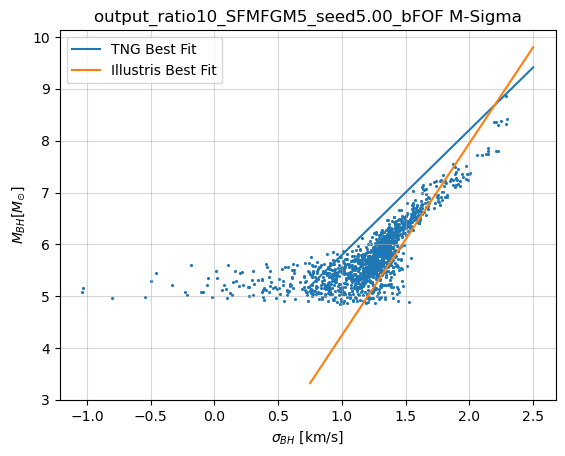

In [6]:
WeightedData=ReadBrahmaData('BrahmaData_M_weighted')
plt.scatter(np.log10(WeightedData[4])[:,0],np.log10(WeightedData[0]),s=1.5)
plt.plot(x,TNGy[0],label='TNG Best Fit')
plt.plot(x,y[0],label='Illustris Best Fit')
plt.xlabel('$\sigma_{BH}$ [km/s]')
plt.ylabel('$M_{BH} [M_{\odot}]$')
#plt.xlim(1.5,2.75)
#plt.ylim(5.5,10.5)
plt.grid(alpha=0.5)
plt.legend()
plt.title('output_ratio10_SFMFGM5_seed5.00_bFOF M-Sigma')
plt.savefig('output_ratio10_SFMFGM5_seed5.00_M_Sigma_BH_weighted.png')